<img src="./images/header.png">

***

# Classificação  de dados utilizando o método   SVM (Support Vector Machines)

## SVM

É uma poderosa metodologia para resolver problemas de aprendizagem de máquina. Proposta em 1995 pelo russo Vladimir Vapnik. Muito utilizado atualmente em diversos tipos de aplicações.

Consiste em um método de aprendizado que tenta encontrar a maior margem para separar diferentes classes de dados. Pertence à classe de algoritmos de aprendizado supervisionado. A essência do SVM é a construção de um hiperplano ótimo, de modo que ele possa separar diferentes classes de dados com a maior margem possível.

<div class="box">
    <img src="./images/svm_1.png"/>
    <span> Como separar as classes </span>
</div>
<div class="box">
    <img src="./images/svm_2.png"/>
    <span> Qual a melor reta? </span>
</div>
<div class="box">
    <img src="./images/svm_3.png"/>
    <span> Hiperplano ótimo </span>
</div>

<style>
div.box {
	width: 150px;
	display: inline-block;
}
</style>

### Vetores de Suporte

Servem para definir qual será o hiperplano. 
São encontrados durante a fase de treinamento.
Os vetores de suporte são os exemplos de treinamento realmente importantes. 
Os outros exemplos podem ser ignorados.

<div class="box">
    <img src="./images/svm_4.png"/>
</div>

<style>
div.box {
	width: 150px;
	display: inline-block;
}
</style>

### Hiperplano:

<div class="box">
    <img src="./images/divisao_1.png"/>
    <span> Espaço 1D = Ponto </span>
</div>

<div class="box">
    <img src="./images/divisao_2.png"/>
    <span> Espaço 2D = Reta </span>
</div>

<div class="box">
    <img src="./images/divisao_3.png"/>
    <span>  </span>
</div>

<style>
div.box {
	width: 150px;
	display: inline-block;
}
</style>

### Kernel 

<div class="box">
    <img src="./images/kernel.png"/>
    <span>  </span>
</div>

<style>
div.box {
	width: 150px;
	display: inline-block;
}
</style>

### Vantagens 

- Consegue lidar bem com grandes conjuntos de exemplos. 
- Trata bem dados de alta dimensão. 
- O processo de classificação é rápido.

### Desvantagens
- É necessário definir um bom Kernel. 
- O tempo de treinamento pode ser bem longo dependendo do número de exemplos e dimensionalidade dos dados.

#### Programa

O código abaixo foi retirado de https://www.astroml.org/book_figures/chapter10/fig_LINEAR_SVM.html 

Importação dos pacotes e  bibliotecas

In [1]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from astroML.datasets import fetch_LINEAR_geneva
from random import *

Declaração das variáveis

In [2]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
# if "setup_text_plots" not in globals():
#     from astroML.plotting import setup_text_plots
# setup_text_plots(fontsize=8, usetex=True)

data = fetch_LINEAR_geneva()

attributes = [('gi', 'logP'),
              ('gi', 'logP', 'ug', 'iK', 'JK', 'amp', 'skew')]
labels = ['$u-g$', '$g-i$', '$i-K$', '$J-K$',
          r'$\log(P)$', 'amplitude', 'skew']
cls = 'LCtype'
Ntrain = 3000



In [3]:
#------------------------------------------------------------
# Create attribute arrays
X = []
y = []

for attr in attributes:
    X.append(np.vstack([data[a] for a in attr]).T)
    LCtype = data[cls].copy()

    # there is no #3.  For a better color scheme in plots,
    # we'll set 6->3
    LCtype[LCtype == 6] = 3
    y.append(LCtype)


In [4]:
#@pickle_results('LINEAR_SVM.pkl')
def compute_SVM_results(i_train, i_test):
    classifiers = []
    predictions = []
    Xtests = []
    ytests = []
    Xtrains = []
    ytrains = []

    for i in range(len(attributes)):
        Xtrain = X[i][i_train]
        Xtest = X[i][i_test]
        ytrain = y[i][i_train]
        ytest = y[i][i_test]

        clf = SVC(kernel='linear', class_weight=None)
        clf.fit(Xtrain, ytrain)
        y_pred = clf.predict(Xtest)

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions



In [5]:
i = np.arange(len(data))
i_train, i_test = train_test_split(i, random_state=0, train_size=2000)
clfs, ypred = compute_SVM_results(i_train, i_test)

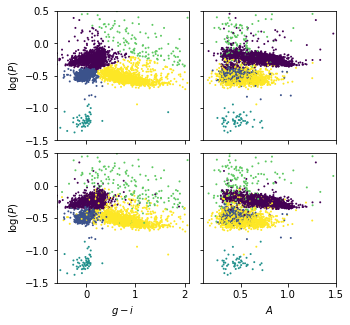

In [6]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

class_labels = []

for i in range(2):
    Xtest = X[i][i_test]
    ytest = y[i][i_test]
    amp = data['amp'][i_test]

    # Plot the resulting classifications
    ax1 = fig.add_subplot(221 + 2 * i)
    ax1.scatter(Xtest[:, 0], Xtest[:, 1],
                c=ypred[i], edgecolors='none', s=4, linewidths=0)

    ax1.set_ylabel(r'$\log(P)$')

    ax2 = plt.subplot(222 + 2 * i)
    ax2.scatter(amp, Xtest[:, 1],
                c=ypred[i], edgecolors='none', s=4, lw=0)

    #------------------------------
    # set axis limits
    ax1.set_xlim(-0.6, 2.1)
    ax2.set_xlim(0.1, 1.5)
    ax1.set_ylim(-1.5, 0.5)
    ax2.set_ylim(-1.5, 0.5)

    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    if i == 0:
        ax1.xaxis.set_major_formatter(plt.NullFormatter())
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax1.set_xlabel(r'$g-i$')
        ax2.set_xlabel(r'$A$')


**Descrição** 	Classificação supervisionada de estrelas variáveis periódicas do conjunto de dados LINEAR usando um método SVM (Máquina de Vetores de Suporte). A amostra de treinamento inclui cinco classes de entrada. A linha superior mostra clusters obtidos usando dois atributos (g - i e  log P), enquanto a linha inferior mostra diagramas análogos para classificação baseada em sete atributos (cores u-g, g -i, i - K e J – K; log P, amplitude da curva de luz, e assimetria da curva de luz). Consulte a Tabela 10.3 para o desempenho da classificação.

## Tabela 10.3

A tabela abaixo apresenta dados relacionados à performance da classificação supervisionada usando o método de Máquinas de Vetores de Suporte. Cada linha corresponde a uma classe de entrada listada na primeira coluna (ab RRL: ab-type RR Lyrae; c RRL: c-type RR Lyrae; EA: Algol-type eclipsing binaries; EB/EW: contact eclipsing binaries; SX Phe: SX Phe and δ Scu candidates). A segunda coluna lista o número de objetos em cada classe de entrada, e as colunas restantes listam a percentagem de fontes classificadas como classes listadas na linha superior. A linha inferior lista a contaminação da classificação em percentagem para cada classe listada na linha superior.

<img src="./images/Table_10_3.png">